In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
library(rvest)
library(stringr)
install.packages('janitor')
library(janitor)
library(ggplot2)
#options(repr.matrix.max.rows = 50)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




**Demonstrating that the dataset can be read from the web into R:**

In [2]:
# reading a csv file containing the data in processed.cleveland.data, 
# with a row of column names (these names are essentially the column names specified in cleve.mod, under ‘Original atts’, without the stuff in brackets)
options(repr.matrix.max.rows = 5)

cleveland_dataset_web <- read_csv(file = url("https://archive.ics.uci.edu/static/public/45/data.csv"))
options(repr.matrix.max.rows = 5)

# number of rows with missing data

cleveland_dataset_web

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,2,130,236,0,2,174,0,0,2,1,3,1
38,1,3,138,175,0,0,173,0,0,1,NaN,3,0


In [3]:
healthy_obs <- cleveland_dataset_web |> filter(num == 0)

num_healthy_rows_with_na <- sum(apply(healthy_obs, 1, anyNA))

sick_obs <- cleveland_dataset_web |> filter(num == 1 | num == 2 | num == 3 | num == 4)

num_sick_rows_with_na <- sum(apply(sick_obs, 1, anyNA))

**Cleaning and wrangling the data into a tidy format:**

In [4]:
cleveland_dataset_web <- as_tibble(cleveland_dataset_web)     
cleveland_dataset_web <- cleveland_dataset_web |>

      mutate(sex = as_factor(sex)) |>
      mutate(sex = fct_recode(sex, "male" = "1", "female" = "0")) |>


      mutate(cp = as_factor(cp)) |>
      mutate(cp = fct_recode(cp, "typical angina" = "1", "atypical angina" = "2", "non-anginal pain" = "3", "asymptomatic" = "4")) |>


      mutate(fbs = as_factor(fbs)) |>
      mutate(fbs = fct_recode(fbs, "true" = "1", "false" = "0")) |>      


      mutate(restecg = as_factor(restecg)) |>
      mutate(restecg = fct_recode(restecg, "normal" = "0", "ST-T wave abnormality" = "1", "left ventricular hypertrophy" = "2")) |>



      mutate(exang = as_factor(exang)) |>
      mutate(exang = fct_recode(exang, "yes" = "1", "no" = "0")) |>


      mutate(slope = as_factor(slope)) |>
      mutate(slope = fct_recode(slope, "upsloping" = "1", "flat" = "2", "downsloping" = "3")) |>


      mutate(thal = as_factor(thal)) |>
      mutate(thal = fct_recode(thal, "normal" = "3", "fixed" = "6", "reversable" = "7")) |>


      mutate(num = as.factor(num)) |>
      mutate(num = fct_recode(num, "healthy" = "0", "sick" = "1", "sick" = "2", "sick" = "3", "sick" = "4"))


cleveland_dataset_web <- cleveland_dataset_web |>

      mutate(sex = as.character(sex)) |>
      mutate(cp = as.character(cp)) |>
      mutate(fbs = as.character(fbs)) |>
      mutate(restecg = as.character(restecg)) |>
      mutate(exang = as.character(exang)) |>
      mutate(slope = as.character(slope)) |>
      mutate(thal = as.character(thal))


      cleveland_dataset_web |> distinct(num)

num
<fct>
healthy
sick


In [5]:
cleveland_dataset_web <- cleveland_dataset_web |>
      rename(Age = age, Sex = sex, "Chest_Pain_Type" = cp, "Resting_Blood_Pressure" = trestbps, Cholesterol = chol, "Fasting_blood_sugar_over_120_mg/dl" = fbs,
      "Resting_ecg_results" = restecg, "Max_heart_rate" = thalach, "Exercise_induced_angina" = exang, "ST_depression_induced_by_exercise_relative_to_rest" = oldpeak, 
      "slope_of_the_peak_exercise_ST_segment" = slope, "Number_of_major_vessels_colored_by_flourosopy" = ca, "Thalassemia" = thal, "Diagnosis_of_heart_disease" = num)

cleveland_dataset_web

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_blood_sugar_over_120_mg/dl,Resting_ecg_results,Max_heart_rate,Exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_of_the_peak_exercise_ST_segment,Number_of_major_vessels_colored_by_flourosopy,Thalassemia,Diagnosis_of_heart_disease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
63,male,typical angina,145,233,true,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed,healthy
67,male,asymptomatic,160,286,false,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,sick
67,male,asymptomatic,120,229,false,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,atypical angina,130,236,false,left ventricular hypertrophy,174,no,0,flat,1,normal,sick
38,male,non-anginal pain,138,175,false,normal,173,no,0,upsloping,NaN,normal,healthy


> **Note:**
> 
> Some issues with cleveland.data:
> 1) 'cleveland.data' is not UTF-8 encoded
> 2) I don't know if we should use this data, because not only are there a bunch of negative values, the website where we downloaded this data does not specify the attributes that each of these columns correspond to
> 3) The number of values in each row varies (wouldn't have been that big of an issue had we known what the attributes are, but alas, we don't

**summarizing the data in at least one table using only training data:**

In [6]:
cleveland_dataset_web <- cleveland_dataset_web |>
      rename("Class" = "Diagnosis_of_heart_disease")
cleveland_dataset_web
cleveland_dataset_web |> distinct(Class)

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_blood_sugar_over_120_mg/dl,Resting_ecg_results,Max_heart_rate,Exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_of_the_peak_exercise_ST_segment,Number_of_major_vessels_colored_by_flourosopy,Thalassemia,Class
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
63,male,typical angina,145,233,true,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed,healthy
67,male,asymptomatic,160,286,false,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,sick
67,male,asymptomatic,120,229,false,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,atypical angina,130,236,false,left ventricular hypertrophy,174,no,0,flat,1,normal,sick
38,male,non-anginal pain,138,175,false,normal,173,no,0,upsloping,NaN,normal,healthy


Class
<fct>
healthy
sick


In [8]:
# we now try to create
# a table that reports 
# the number of healthy and sick observations, 
# the percentage of healthy and sick observations,
# the average ages of healthy and sick observations, 
# the average resting blood pressures of healthy and sick observations,
# the average cholesterol of healthy and sick observations,
# average max heart rate of healthy and sick observations,
# average ST depression induced by exercise relative to rest for healthy and sick observations,
# average number of vessels colored by flourosopy for healthy and sick observations,
# and the number of rows with missing values for healthy and sick observations
# for each class in our dataset
num_obs <- nrow(cleveland_dataset_web)

cleveland_dataset_web <- cleveland_dataset_web

In [9]:
# this code will generate a table that reports all of the aforementioned summary statistics save for the number of rows with missing values
cleveland_dataset_web |>
      group_by(Class) |>
      summarize(
         count = n(),
         percentage = count / num_obs * 100,
         average_age = mean(Age, na.rm = TRUE),
         avg_resting_bp = mean(Resting_Blood_Pressure, na.rm = TRUE),
         avg_cholestorol = mean(Cholesterol, na.rm = TRUE),
         avg_max_hr = mean(Max_heart_rate, na.rm = TRUE),
         avg_oldpeak = mean(ST_depression_induced_by_exercise_relative_to_rest, na.rm = TRUE),
         avg_ca = mean(Number_of_major_vessels_colored_by_flourosopy, na.rm = TRUE)
         )

# cleveland_dataset_web |> ungroup()

Class,count,percentage,average_age,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak,avg_ca
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,164,54.12541,52.58537,129.2500,242.6402,158.378,0.5865854,0.2732919
sick,139,45.87459,56.62590,134.5683,251.4748,139.259,1.5741007,1.1376812


In [10]:
# this code attempts to generate a table that reports all of the aforementioned summary statistics, but fails to print out some of the columns. 
# for whatever reason, the table does not output a count column when the result of summarize(...) is piped to mutate(...)

cleveland_dataset_web |> 
      group_by(Class) |> 
      summarize(
         count = n(),
         percentage = count / num_obs * 100,
         average_age = mean(Age, na.rm = TRUE),
         avg_resting_bp = mean(Resting_Blood_Pressure, na.rm = TRUE),
         avg_cholestorol = mean(Cholesterol, na.rm = TRUE),
         avg_max_hr = mean(Max_heart_rate, na.rm = TRUE),
         avg_oldpeak = mean(ST_depression_induced_by_exercise_relative_to_rest, na.rm = TRUE),
         avg_ca = mean(Number_of_major_vessels_colored_by_flourosopy, na.rm = TRUE)
         ) |>
          mutate(num_rows_with_na = ifelse(Class == "healthy", num_healthy_rows_with_na, num_sick_rows_with_na)) |>
          select(-num_healthy_rows_with_na, -num_sick_rows_with_na)

# cleveland_dataset_web |> ungroup()

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(num_healthy_rows_with_na)

  # Now:
  data %>% select(all_of(num_healthy_rows_with_na))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”
Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(num_sick_rows_with_na)

  # Now:
  data %>% select(all_of(num_sick_rows_with_na))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


Class,percentage,avg_resting_bp,avg_cholestorol,avg_max_hr,avg_oldpeak,avg_ca,num_rows_with_na
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
healthy,54.12541,129.2500,242.6402,158.378,0.5865854,0.2732919,4
sick,45.87459,134.5683,251.4748,139.259,1.5741007,1.1376812,2


In [11]:
# this code generates a table that reports
# the number of healthy and sick observations
cleveland_dataset_web |> 
      group_by(Class) |> 
      summarize(
         count = n()#,
         # percentage = count / num_obs * 100
         )

# cleveland_dataset_web |> ungroup()

Class,count
<fct>,<int>
healthy,164
sick,139


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_blood_sugar_over_120_mg/dl,Resting_ecg_results,Max_heart_rate,Exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_of_the_peak_exercise_ST_segment,Number_of_major_vessels_colored_by_flourosopy,Thalassemia,Class
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
63,male,typical angina,145,233,true,left ventricular hypertrophy,150,no,2.3,downsloping,0,fixed,healthy
67,male,asymptomatic,160,286,false,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,sick
67,male,asymptomatic,120,229,false,left ventricular hypertrophy,129,yes,2.6,flat,2,reversable,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,atypical angina,130,236,false,left ventricular hypertrophy,174,no,0,flat,1,normal,sick
38,male,non-anginal pain,138,175,false,normal,173,no,0,upsloping,NaN,normal,healthy


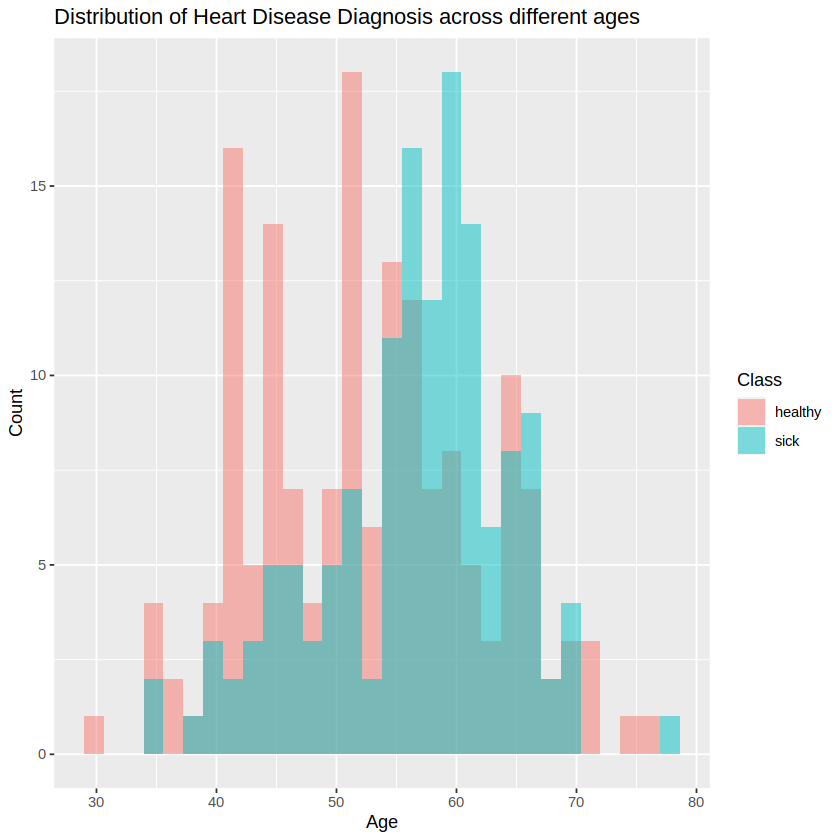

`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.


Class,Chest_Pain_Type,count
<fct>,<chr>,<int>
healthy,asymptomatic,39
healthy,atypical angina,41
healthy,non-anginal pain,68
⋮,⋮,⋮
sick,non-anginal pain,18
sick,typical angina,7


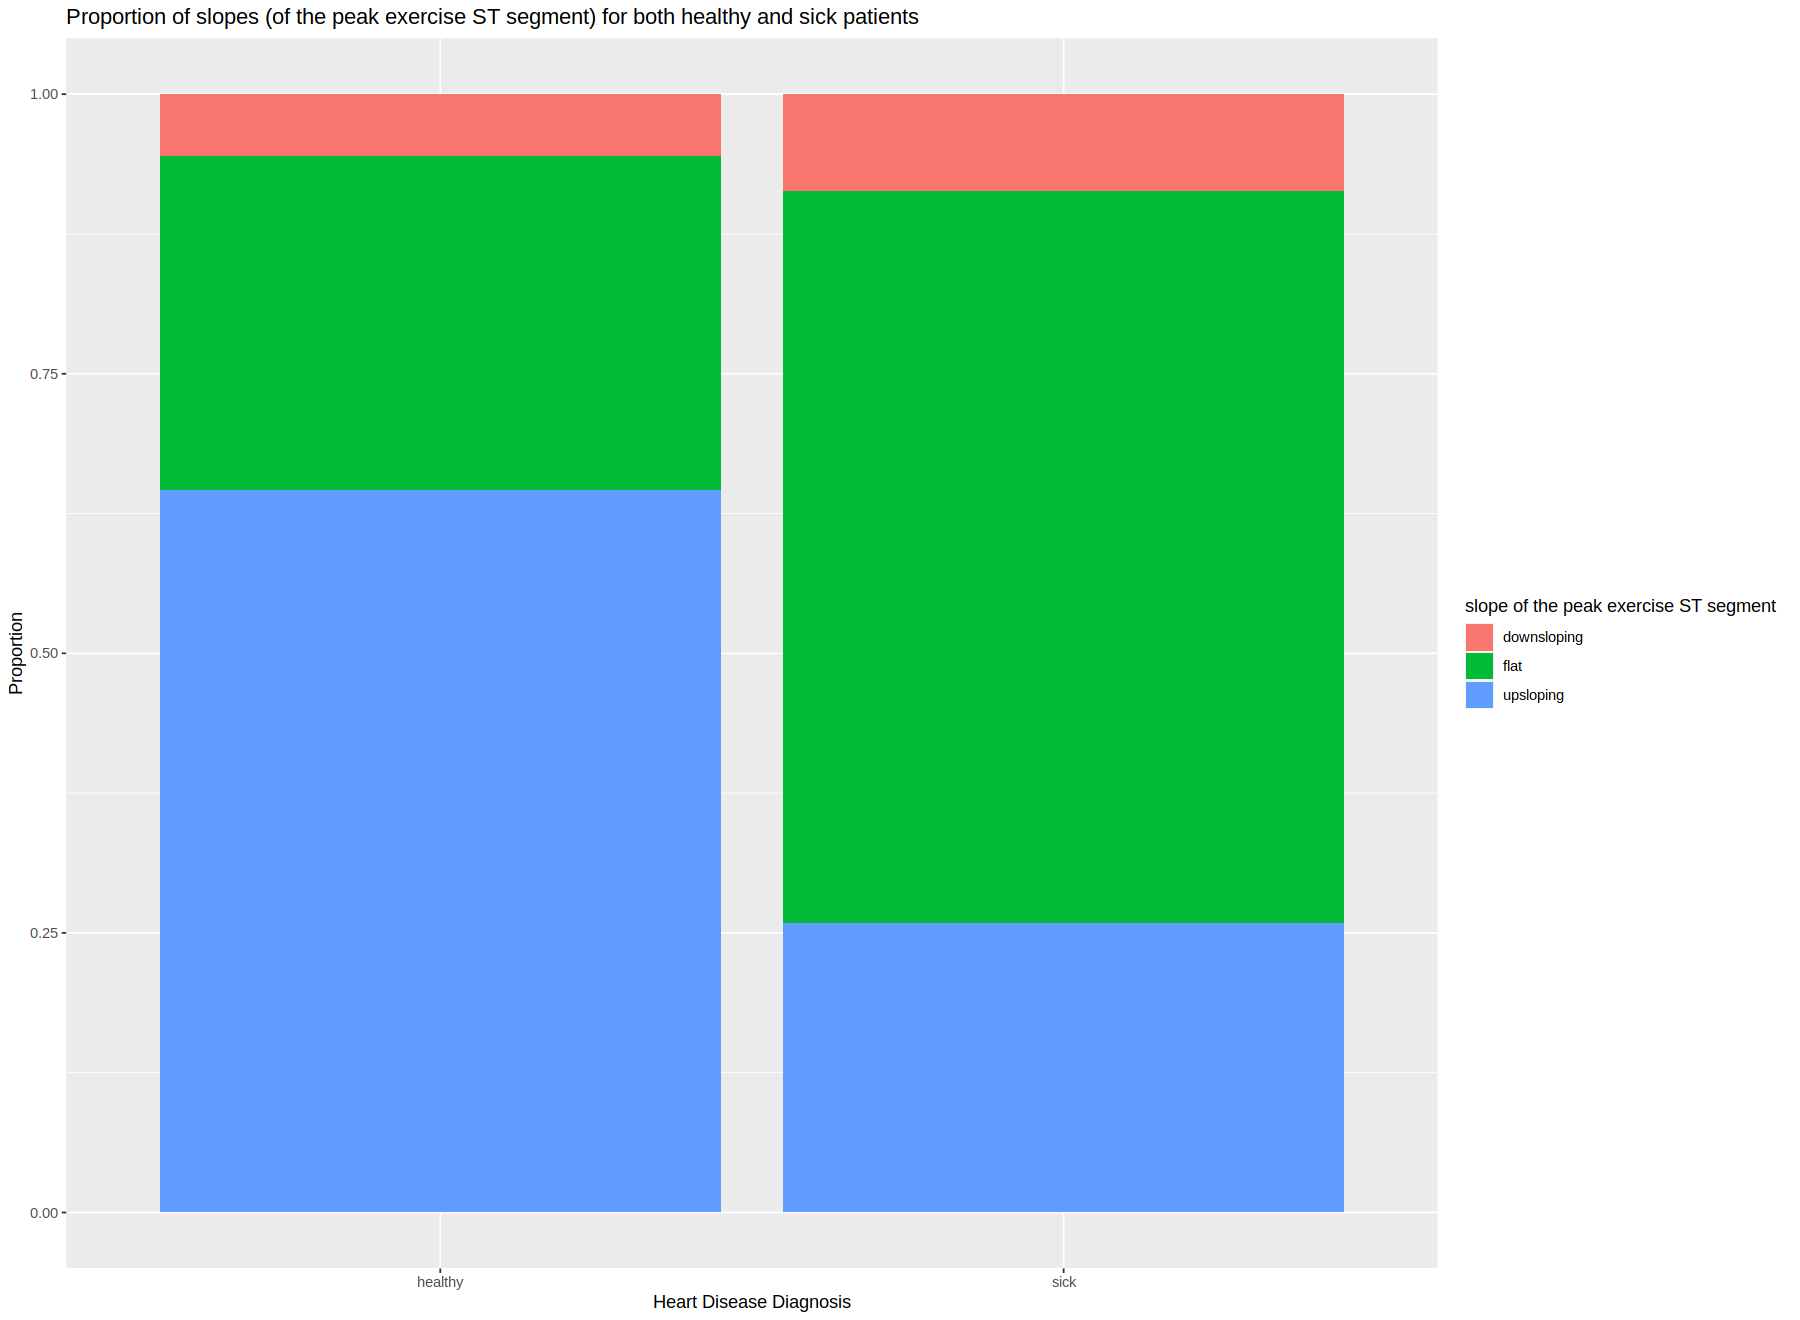

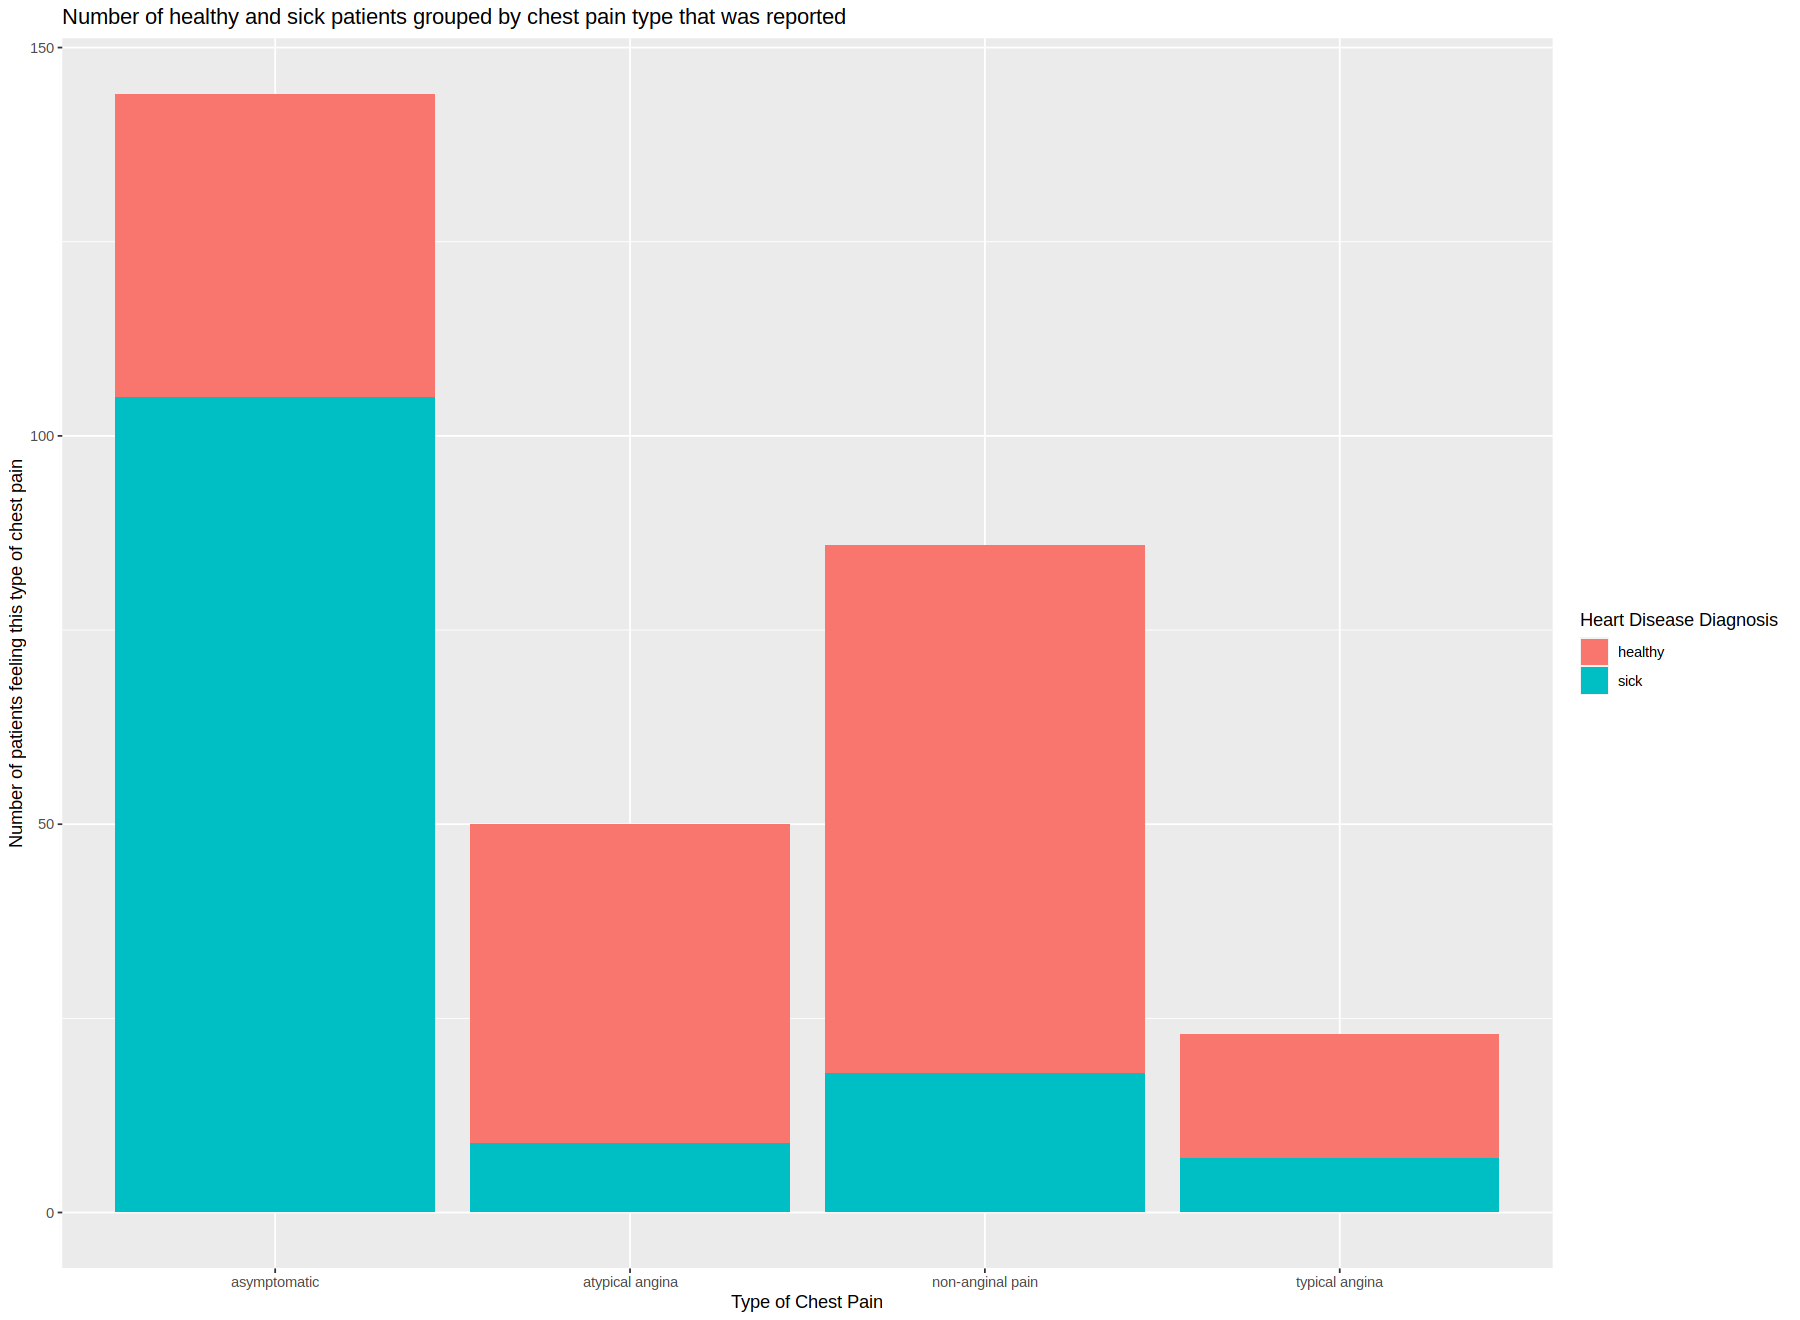

In [12]:
# visualizing the data with a plot relevant to the analysis we plan to do using only training data

# option 1
heart_disease_plot_1 <- cleveland_dataset_web |> 
  ggplot(aes(x = Age, fill = Class)) + 
  geom_histogram(position = "identity", alpha = 0.5) +
  xlab("Age") +
  ylab("Count") +
  ggtitle("Distribution of Heart Disease Diagnosis across different ages")
heart_disease_plot_1

# option 2
options(repr.plot.width = 15, repr.plot.height = 11) 
cleveland_with_count <- cleveland_dataset_web
cleveland_with_count

heart_disease_plot_2 <- cleveland_with_count |>
  ggplot(aes(x = Class, fill = factor(slope_of_the_peak_exercise_ST_segment))) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of slopes (of the peak exercise ST segment) for both healthy and sick patients", x = "Heart Disease Diagnosis", y = "Proportion", fill = "slope of the peak exercise ST segment")
heart_disease_plot_2

#option 3
cleveland_with_count <- cleveland_with_count |> 
   group_by(Class, Chest_Pain_Type) |>
   summarize(count = n())
  
cleveland_with_count

heart_disease_plot_3 <- cleveland_with_count |>
  ggplot(aes(x = Chest_Pain_Type, y = count, fill = Class)) +
  geom_bar(stat = "identity") + 
  xlab("Type of Chest Pain") +
  ylab("Number of patients feeling this type of chest pain") +
  labs(title = "Number of healthy and sick patients grouped by chest pain type that was reported", fill = "Heart Disease Diagnosis")
heart_disease_plot_3

# Methods #

## Explain how you will conduct either your data analysis and which variables/columns you will use. ##
K-nearest neighbors algorithm will be used to predict if a patient is healthy or sick primarily based on their age, cholesterol, and/or resting blood pressure. Other factors, such as type of chest pain, may be explored to determine if filtering among groups would result in a more precise and accurate classification instead. 


## Describe at least one way that you will visualize the results ##

Histograms will first be used to determine if there is an association between age, cholesterol, resting blood pressure and sick vs. healthy patients. Then, a scatterplot will be used to plot two of these variables against each other. The points will be colored based on sick vs. healthy. 


